## Homework 1.5 - Coding

This is the coding portion of the homework assignment for Section 1.5.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

## Problem 1.26

### Part (i)

Create a function `create_arrays_prob_26()`, which accepts as an argument $k$, and returns as numpy arrays:

1.  $A$: A random matrix of size $2^k \times 2^k$
2.  $B$: A random matrix of size $2^k \times 2^k$
3.  $\mathbf{x}$: A random vector of size $2^k$.

In [4]:
def create_arrays_prob_26(k: int) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Creates the arrays called for in Problem 1.26.
    
    Args:
        k (int): The power of 2 used for dimensions of the arrays
    
    Returns:
        A (np.ndarray): A random matrix of size $2^k \times 2^k$
        B (np.ndarray): A random matrix of size $2^k \times 2^k$
        x (np.ndarray): A random vector of size 2^k
    """
    n = 2**k
    A = np.random.random((n,n))
    B = np.random.random((n,n))
    x = np.random.random(n)

    return A, B, x

### Part (ii)

For $k = 1, 2, \ldots, 11$, time the computation of $(AB)\mathbf{x}$ versus the computation of $A(B\mathbf{x})$.

Store the times in the lists `matrices_first_times` and `vector_first_times`, respectively.

In [12]:
matrices_first_times = []
vector_first_times = []
k_vals = np.arange(1,12)

for k in k_vals:
    A, B, x = create_arrays_prob_26(k)
    start = time()
    (A@B)@x
    end = time()
    matrices_first_times.append(end - start)    
    start = time()
    A@(B@x)
    end = time()
    vector_first_times.append(end - start)

For each $k$, find the ratio of the time it takes to compute $(AB)\mathbf{x}$ versus $A(B\mathbf{x})$. Store the result in the list `ratios`.

In [13]:
ratios = []

for m, v in zip(matrices_first_times, vector_first_times):
    ratios.append(m/v)

Once you have done the above work, run the next cell to see how the ratios compare over time:

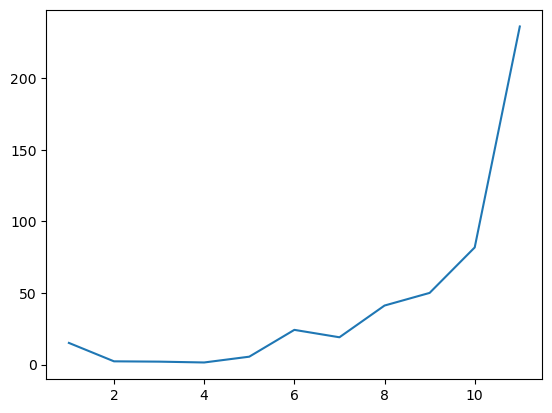

In [14]:
plt.plot(k_vals, ratios)

When $k$ increases by one, does the ratio of the times of the two computations change? By how much? Explain this in terms of what we ahve discussed about the complexity of matrix-matrix and matrix-vector multiplication.

**Explanation**: _As k increases by one, the ratio increases by 0.5n.  Matrix-Matrix multiplication is ln(2m - 1) = 2n^3 - n^2 when n = m = l and Matrix-Vector multiplication is m(2n - 1) = 2n^2 - n when n = m.  Matrix first does a matrix-matrix and then matrix-vector multiplication, while vector first does a 2 matrix-vector multiplications, with complexity (2n^2 - n).  Then matrix-first multiplication has leading order complexity 2n^3 and vector-first multiplication has leading order temporal complexity 4n^2_

---

## Problem 1.27

**IMPORTANT:** You should have verified algebraically (by hand) that
$$(I_n + \mathbf{u} \mathbf{v}^\top) \mathbf{x} = \mathbf{x} + \mathbf{u}\left(\mathbf{v}^\top \mathbf{x} \right) \text{ for any } \mathbf{u}, \mathbf{v}, \mathbf{x} \in \mathbb{R}^n$$
and turned it into the written assignment for 1.5. If you have not done that, do it now before proceeding.

### Part (i)

Write a function `create_arrays_prob_27()` which accepts as an argument $n$, and returns the following as numpy arrays:

1. The $2^n \times 2^n$ identity matrix $I$
2. $\mathbf{u}$ (a random vector of size $2^n$)
3. $\mathbf{v}$ (a random vector of size $2^n$)
4. $\mathbf{x}$ (a random vector of size $2^n$)

In [17]:
def create_arrays_prob_27(n: int) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Creates the arrays called for in Problem 1.27.
    
    Args:
        n (int): The power of 2 used for dimensions of the arrays
    
    Returns:
        I (np.ndarray): The 2^n x 2^n identity matrix
        u (np.ndarray): A random vector of size 2^n
        v (np.ndarray): A random vector of size 2^n
        x (np.ndarray): A random vector of size 2^n
    """
    dim = 2**n
    I = np.eye(dim)
    u, v, x, = np.random.random(dim), np.random.random(dim), np.random.random(dim)
    return I, u, v, x


    

Time the computation of $(I + \mathbf{u}\mathbf{v}^\top)\mathbf{x}$ versus $\mathbf{x} + \mathbf{u}(\mathbf{v}^\top \mathbf{x})$.

Store the results in the lists `compact_times` and `expanded_times`, respectively.

In [24]:
n_vals = np.arange(1,12)
compact_times = []      # Times for (I + uv^T)x
expanded_times = []     # Times for x + u(v^T x)

for n in n_vals:
    I, u, v, x = create_arrays_prob_27(n)
    start = time()
    (I + u*np.transpose(v))@x 
    end = time()
    compact_times.append(end-start)

    start = time()
    x + u*(np.transpose(v)*x)
    end = time()
    expanded_times.append(end-start)
    

For each $k$, find the ratio of the time it takes to compute $(I + \mathbf{u} \mathbf{v}^\top)\mathbf{x}$ versus $\mathbf{x} + \mathbf{u}(\mathbf{v}^\top \mathbf{x})$.

Store the result in the list `ratios`.

In [25]:
ratios = []

for c, e in zip(compact_times, expanded_times):
    ratios.append(c/e)

Once you have done the above work, inspect the ratio of computation times by running the following cell:

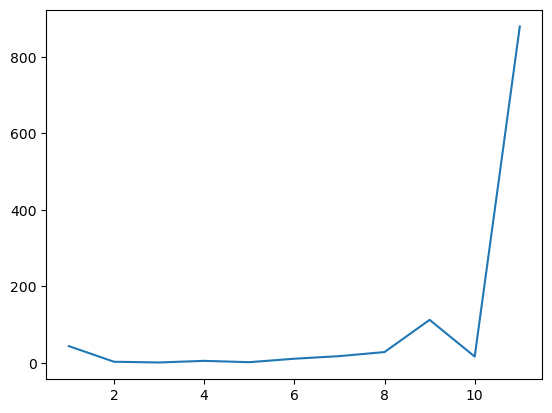

In [26]:
plt.plot(n_vals, ratios)

Compare the computation times by describing how the ratio of the two grows as $n$ gets larger. 
Explain this in terms of the asymptotic temporal complexity of the two computations.

**Explanation**: _Compact time increases n more than expanded for each k.  compact requires 1 vector-vector-mult op, 1 matrix-matrix add op, and 1 matrix-vector mult op.  This is n + n^2 + 2n^2 respectively.  Expanded required 2 vector-vector mult and 1 vector-vector add.  Then compact and expanded leading order temporal flop complexity are 3n^2 and 3n respectively._

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.

compact: n + n^2 + 2n^2 = 3n^2
expand: 2n +n = 3n